#### General Steps to Follow

1. Problem Statement
2. Importing Packages
3. Data Collection
4. Checking the Data

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## 1) Problem statement
- I will build an AI model that triggers the word "activate". Every time it hears you say "activate", it will make a "chiming" sound.

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## 2) Importing Packages

#### Add the repository directory path to the Python path

In [1]:
import os
import sys

REPO_DIR_PATH = os.path.normpath(os.path.join(
    os.path.join(os.path.dirname(os.getcwd()))))

sys.path.append(REPO_DIR_PATH)

In [2]:
from src.utils import compute_spectrogram, plot_spectrogram, get_wav_info
import IPython

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## 3) Data Collection

- I used the dataset from the "Sequence Models" course in the "Deep Learning" Specialization on Coursera. 
- The data is located at "Trigger_word_detection_v2a" Lab on week3.

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## 4) Checking the Data

* In the `data` directory, you can find a subset of the raw audio files of the positive words, negative words, and background noise. 
    * The `data/external/positive` directory contains positive examples of people saying the word "activate". 
    * The `data/external/negative` directory contains negative examples of people saying random words other than "activate". 
    * There is one word per audio recording.
    * The `data/external/background` directory contains 10 second clips of background noise in different environments.

##### Listening to a positive example

In [6]:
IPython.display.Audio("../data/external/positive/1.wav")

##### Listening to a negative example

In [7]:
IPython.display.Audio("../data/external/negative/1.wav")

##### Listening to a background example

In [8]:
IPython.display.Audio("../data/external/background/1.wav")

### From Audio Recordings to Spectrograms

What really is an audio recording? 
* A microphone records little variations in air pressure over time, and it is these little variations in air pressure that your ear also perceives as sound. 
* You can think of an audio recording as a long list of numbers measuring the little air pressure changes detected by the microphone. 
* We will use audio sampled at 44100 Hz (or 44100 Hertz). 
    * This means the microphone gives us 44,100 numbers per second. 
    * Thus, a 10 second audio clip is represented by 441,000 numbers (= $10 \times 44,100$). 

#### Spectrogram
* It is quite difficult to figure out from this "raw" representation of audio whether the word "activate" was said. 
* In  order to help your sequence model more easily learn to detect trigger words, we will compute a *spectrogram* of the audio. 
* The spectrogram tells us how much different frequencies are present in an audio clip at any moment in time. 
* A spectrogram is computed by sliding a window over the raw audio signal, and calculating the most active frequencies in each window using a Fourier transform.


##### Visualizing the spectogram of a WAV file

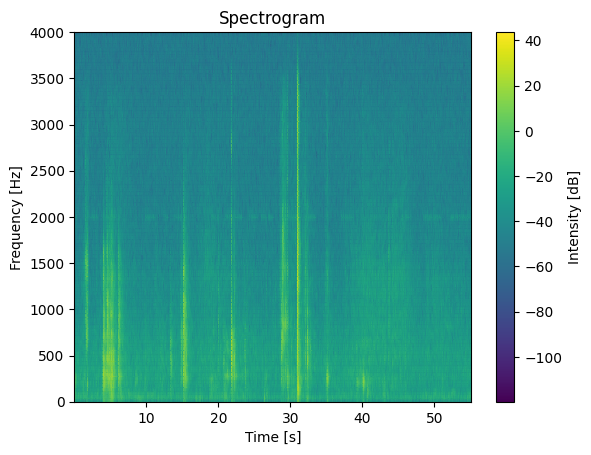

In [9]:
wav_file = "../data/external/background/1.wav"
freqs, times, spectogram_matrix = compute_spectrogram(wav_file)
plot_spectrogram(freqs, times, spectogram_matrix)

* The color in the spectrogram shows the degree to which different frequencies are present (loud) in the audio at different points in time. 
* Green means a certain frequency is more active or more present in the audio clip (louder).
* Blue squares denote less active frequencies.
* The dimension of the output spectrogram depends upon the hyperparameters of the spectrogram software and the length of the input. 
* We will be working with 10 second audio clips as the "standard length" for our training examples. 
    * The number of timesteps of the spectrogram will be 5511. 
    * The spectrogram will be the input $x$ into the network, and so $T_x = 5511$.

In [10]:
spectogram_matrix.shape

(101, 5511)

- The number of time steps input to the model from the spectrogram = 5511
- Number of frequencies input to the model at each time step of the spectrogram = 101
- Al of this is for 10 second audio clips.
- The output of our model will divide 10 seconds into 1,375 units.
    * $T_y = 1375$
    * For each of the 1375 time steps, the model predicts whether someone recently finished saying the trigger word "activate". 
- All of these are hyperparameters and can be changed (except the 441000, which is a function of the microphone). 
- We have chosen values that are within the standard range used for speech systems.